## Deep Feedforward Neural Network

## Objective:
Build and evaluate a Deep Feedforward Neural Network
using TensorFlow/Keras. Do not use CNNs or RNNs—only custom
DNNs using Dense layers.

## Group : 153

## Group Member Names:
Suraj Anand — ID: 2024AA05731

Ashvini Satish Bhosale — ID: 2024AA05732

Bollam Manindra — ID: 2024AA05733

Nikhil Yadav — ID: 2024AA05735

# 1. Import the required libraries

In [1]:
%pip install tensorflow tensorflow-datasets matplotlib seaborn scikit-learn

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import time

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

print(f"TensorFlow version: {tf.__version__}")

Note: you may need to restart the kernel to use updated packages.
TensorFlow version: 2.19.0


# 2. Data Acquisition  -- Score: 0.5 Mark

For the problem identified by you, students have to find the data source themselves from any data source.





In [2]:
# Option A: Fashion-MNIST (Small - ~30MB)
print("Loading Fashion-MNIST dataset...")
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


print("Dataset loaded successfully!")
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# Memory usage check
print(f"\nMemory usage:")
print(f"Training data: {x_train.nbytes / (1024**2):.1f} MB")
print(f"Test data: {x_test.nbytes / (1024**2):.1f} MB")
print(f"Total: {(x_train.nbytes + x_test.nbytes) / (1024**2):.1f} MB")

Loading Fashion-MNIST dataset...
Dataset loaded successfully!
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)

Memory usage:
Training data: 44.9 MB
Test data: 7.5 MB
Total: 52.3 MB


# METHOD 1: Using TensorFlow Datasets (for larger datasets like CIFAR-10)


In [3]:
## As we can see, the Fashion-MNIST dataset is small enough to fit comfortably in memory.

## 2.1 Code for converting the above downloaded data into a form suitable for DL

## 2.1 Write your observations from the above.

1. Size of the dataset
2. What type of data attributes are there?
3. What are you classifying?
4. Plot the distribution of the categories of the target / label.




=== DATASET ANALYSIS ===
1. Size of dataset:
   - Training samples: 60000
   - Test samples: 10000
   - Total samples: 70000

2. Data attributes:
   - Image dimensions: 28 x 28 pixels
   - Color channels: Grayscale (1 channel)
   - Pixel value range: 0 to 255
   - Data type: uint8

3. Classification task:
   - Number of classes: 10
   - Classes: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4. Label distribution:
   - T-shirt/top: 6000 samples
   - Trouser: 6000 samples
   - Pullover: 6000 samples
   - Dress: 6000 samples
   - Coat: 6000 samples
   - Sandal: 6000 samples
   - Shirt: 6000 samples
   - Sneaker: 6000 samples
   - Bag: 6000 samples
   - Ankle boot: 6000 samples


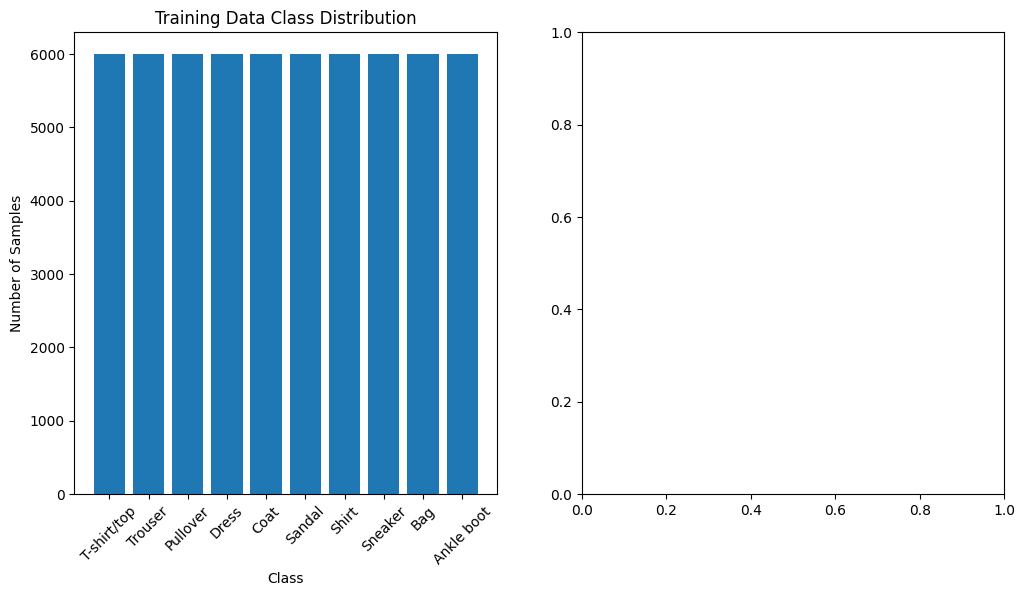

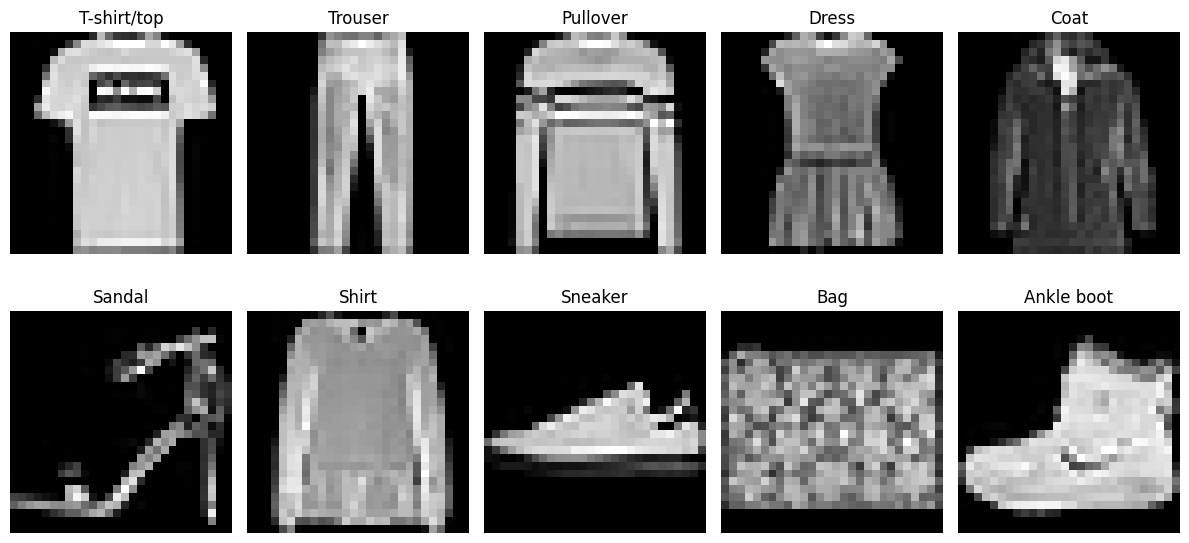

In [4]:
print("\n=== DATASET ANALYSIS ===")
print(f"1. Size of dataset:")
print(f"   - Training samples: {x_train.shape[0]}")
print(f"   - Test samples: {x_test.shape[0]}")
print(f"   - Total samples: {x_train.shape[0] + x_test.shape[0]}")

print(f"\n2. Data attributes:")
print(f"   - Image dimensions: {x_train.shape[1]} x {x_train.shape[2]} pixels")
print(f"   - Color channels: Grayscale (1 channel)")
print(f"   - Pixel value range: {x_train.min()} to {x_train.max()}")
print(f"   - Data type: {x_train.dtype}")

print(f"\n3. Classification task:")
print(f"   - Number of classes: {len(class_names)}")
print(f"   - Classes: {class_names}")

print(f"\n4. Label distribution:")
unique, counts = np.unique(y_train, return_counts=True)
for i, (label, count) in enumerate(zip(unique, counts)):
    print(f"   - {class_names[label]}: {count} samples")

# Plot class distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(len(class_names)), counts)
plt.title('Training Data Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(range(len(class_names)), class_names, rotation=45)

# Show sample images
plt.subplot(1, 2, 2)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    row, col = i // 5, i % 5
    axes[row, col].imshow(x_train[y_train == i][0], cmap='gray')
    axes[row, col].set_title(f'{class_names[i]}')
    axes[row, col].axis('off')
plt.tight_layout()
plt.show()

# 3. Data Preparation -- Score: 1 Mark

Perform the data prepracessing that is required for the data that you have downloaded.


This stage depends on the dataset that is used.

## 3.1 Apply pre-processing techiniques

* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies
* Encode categorical data
* Normalize the data
* Feature Engineering
* Stop word removal, lemmatiation, stemming, vectorization


IF ANY

In [5]:
print("\n=== DATA PREPROCESSING ===")

# 3.1 Preprocessing techniques
print("Applying preprocessing techniques...")

# No duplicates check needed for Fashion-MNIST (clean dataset)
print("No duplicate removal needed (Fashion-MNIST is a clean dataset)")

# Check for missing values
print(f"Missing values in training data: {np.isnan(x_train).sum()}")
print(f"Missing values in test data: {np.isnan(x_test).sum()}")


# Normalize the data: Normalize pixel values to [0, 1] range
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

print(f"Data normalized: pixel values now range from {x_train_normalized.min()} to {x_train_normalized.max()}")

# Flatten images for Dense layers (28x28 -> 784)
x_train_flattened = x_train_normalized.reshape(x_train_normalized.shape[0], -1)
x_test_flattened = x_test_normalized.reshape(x_test_normalized.shape[0], -1)

print(f"Images flattened: {x_train.shape} -> {x_train_flattened.shape}")


=== DATA PREPROCESSING ===
Applying preprocessing techniques...
No duplicate removal needed (Fashion-MNIST is a clean dataset)
Missing values in training data: 0
Missing values in test data: 0
Data normalized: pixel values now range from 0.0 to 1.0
Images flattened: (60000, 28, 28) -> (60000, 784)


## 3.2 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.





In [6]:
print("\nPreparing target variables...")

# One-hot encode labels for categorical classification
y_train_categorical = to_categorical(y_train, num_classes=10)
y_test_categorical = to_categorical(y_test, num_classes=10)

print(f"Labels one-hot encoded: {y_train.shape} -> {y_train_categorical.shape}")
print(f"Sample original label: {y_train[0]} -> One-hot: {y_train_categorical[0]}")


Preparing target variables...
Labels one-hot encoded: (60000,) -> (60000, 10)
Sample original label: 9 -> One-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## 3.3 Split the data into training set and testing set

In [7]:
from sklearn.model_selection import train_test_split

# Create validation set from training data (80% train, 20% validation)
x_train_final, x_val, y_train_final, y_val = train_test_split(
    x_train_flattened, y_train_categorical,
    test_size=0.2, random_state=42, stratify=y_train
)

print(f"\nFinal data splits:")
print(f"Training set: {x_train_final.shape[0]} samples")
print(f"Validation set: {x_val.shape[0]} samples")
print(f"Test set: {x_test_flattened.shape[0]} samples")


Final data splits:
Training set: 48000 samples
Validation set: 12000 samples
Test set: 10000 samples


## 3.4 Preprocessing report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present
* to impute or remove missing data, if present
* to remove data inconsistencies, if present
* to encode categorical data
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset


## Methods Adopted and Justifications

* Duplicate Removal:
Not required.
The Fashion-MNIST dataset is a well-curated benchmark dataset provided by TensorFlow/Keras. It does not contain duplicate entries, and hence no duplicate removal was necessary.

* Missing Data Handling:
None found in the dataset.
Fashion-MNIST is complete and does not have missing pixel values or labels. Thus, no imputation or removal of missing data was needed.

* Data Inconsistencies:
None present.
As the dataset is standardized, there are no anomalies, corrupt samples, or out-of-bound values. No correction for inconsistencies was required.

* Categorical Encoding:
Applied one-hot encoding to target labels.
The output labels (0–9) represent 10 classes of clothing items. One-hot encoding is applied to convert these integer labels into a binary matrix form, which is suitable for multi-class classification tasks using softmax.

* Normalization:
Min-Max normalization (pixel values scaled to [0, 1]).
The raw pixel values range from 0 to 255. These are scaled to a 0–1 range by dividing by 255 to normalize the feature space. This improves training stability and speeds up convergence of gradient-based learning algorithms.

* Feature Engineering:
Flattened 28×28 images to 784-dimensional vectors.
The 2D image matrices were flattened into 1D vectors to feed into fully connected neural network layers (MLP). This is essential for models that do not natively handle image-shaped input.

### Final Dataset Sizes

* Training Set: 48,000 samples
* Validation Set: 12,000 samples (subset from training for validation)
* Testing Set: 10,000 samples

# 4. Deep Neural Network Architecture - Score:  Marks


## 4.1 Design the architecture that you will be using

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN.

In [8]:
def create_dnn_model(input_shape=784, num_classes=10):
    """
    Create a Deep Neural Network with only Dense layers
    """
    model = keras.Sequential([
        keras.Input(shape=(input_shape,), name='input_layer'),
        layers.Dense(512, activation='relu', name='hidden_layer_1'),
        layers.Dense(256, activation='relu', name='hidden_layer_2'),
        layers.Dense(128, activation='relu', name='hidden_layer_3'),
        layers.Dense(64, activation='relu', name='hidden_layer_4'),
        layers.Dense(num_classes, activation='softmax', name='output_layer')
    ])
    return model

# Create the base model
base_model = create_dnn_model()

# Display model architecture
print("Model Architecture:")
base_model.summary()

Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 575,050 (2.19 MB)

 Trainable params: 575,050 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

## 4.2 DNN Report

Report the following and provide justification for the same.



* Number of layers
* Number of units in each layer
* Total number of trainable parameters



In [9]:
print("\n=== DNN ARCHITECTURE REPORT ===")
print("Architecture Details and Justifications:")
print("- Number of layers: 5 (4 hidden + 1 output)")
print("- Layer structure:")
print("  * Hidden Layer 1: 512 units, ReLU activation")
print("  * Hidden Layer 2: 256 units, ReLU activation")
print("  * Hidden Layer 3: 128 units, ReLU activation")
print("  * Hidden Layer 4: 64 units, ReLU activation")
print("  * Output Layer: 10 units, Softmax activation")

# Count parameters
total_params = base_model.count_params()
print(f"- Total trainable parameters: {total_params:,}")

print("\nJustifications:")
print("- Decreasing units (512->256->128->64): Creates hierarchical feature learning")
print("- ReLU activation: Prevents vanishing gradient problem, computationally efficient")
print("- Softmax output: Suitable for multi-class classification (provides probabilities)")
print("- 4 hidden layers: Sufficient depth for learning complex patterns in fashion items")


=== DNN ARCHITECTURE REPORT ===
Architecture Details and Justifications:
- Number of layers: 5 (4 hidden + 1 output)
- Layer structure:
  * Hidden Layer 1: 512 units, ReLU activation
  * Hidden Layer 2: 256 units, ReLU activation
  * Hidden Layer 3: 128 units, ReLU activation
  * Hidden Layer 4: 64 units, ReLU activation
  * Output Layer: 10 units, Softmax activation
- Total trainable parameters: 575,050

Justifications:
- Decreasing units (512->256->128->64): Creates hierarchical feature learning
- ReLU activation: Prevents vanishing gradient problem, computationally efficient
- Softmax output: Suitable for multi-class classification (provides probabilities)
- 4 hidden layers: Sufficient depth for learning complex patterns in fashion items


# 5. Training the model - Score: 1 Mark


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.

In [10]:
print("\n=== MODEL TRAINING ===")

# 5.1 Configure the training
print("Configuring model for training...")

base_model.compile(
    optimizer='sgd',  # Stochastic Gradient Descent as required
    loss='categorical_crossentropy',  # For multi-class classification
    metrics=['accuracy']
)

print("Model compiled with:")
print("- Optimizer: SGD (Stochastic Gradient Descent)")
print("- Loss function: Categorical Crossentropy")
print("- Metrics: Accuracy")


=== MODEL TRAINING ===
Configuring model for training...
Model compiled with:
- Optimizer: SGD (Stochastic Gradient Descent)
- Loss function: Categorical Crossentropy
- Metrics: Accuracy


## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.

In [11]:
print("\nStarting model training...")

# Record training time
start_time = time.time()

# Train for 20 epochs as required
history_base = base_model.fit(
    x_train_final, y_train_final,
    batch_size=128,
    epochs=20,
    validation_data=(x_val, y_val),
    verbose=1
)

end_time = time.time()
training_time = end_time - start_time

print(f"\nTraining completed!")
print(f"Total training time: {training_time:.2f} seconds")
print(f"Average time per epoch: {training_time/20:.2f} seconds")


Starting model training...
Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4929 - loss: 1.6022 - val_accuracy: 0.7372 - val_loss: 0.7253
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7700 - loss: 0.6758 - val_accuracy: 0.7875 - val_loss: 0.5855
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8032 - loss: 0.5690 - val_accuracy: 0.8070 - val_loss: 0.5314
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8190 - loss: 0.5192 - val_accuracy: 0.8197 - val_loss: 0.5023
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8291 - loss: 0.4889 - val_accuracy: 0.8276 - val_loss: 0.4828
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8363 - loss: 0.4665 - val_accuracy: 0.8325 - val_loss: 0.4696
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8420 - loss: 0.4489 - val_accuracy: 0.8364 - val_loss: 0.4579
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8472 - los

Justify your choice of optimizers and regulizations used and the hyperparameters tuned


In [12]:
print("\n=== TRAINING CONFIGURATION JUSTIFICATION ===")
print("Optimizer choice (SGD):")
print("- Required by assignment specifications")
print("- Simple and stable optimizer")
print("- Good baseline for comparison with other optimizers")
print("\nHyperparameters:")
print("- Batch size: 128 (good balance between memory usage and gradient stability)")
print("- Epochs: 20 (as specified in assignment)")
print("- Learning rate: Default SGD rate (typically 0.01)")


=== TRAINING CONFIGURATION JUSTIFICATION ===
Optimizer choice (SGD):
- Required by assignment specifications
- Simple and stable optimizer
- Good baseline for comparison with other optimizers

Hyperparameters:
- Batch size: 128 (good balance between memory usage and gradient stability)
- Epochs: 20 (as specified in assignment)
- Learning rate: Default SGD rate (typically 0.01)


# 6. Test the model - 0.5 marks


In [13]:
print("\n=== MODEL TESTING ===")

# Evaluate on test set
test_loss, test_accuracy = base_model.evaluate(x_test_flattened, y_test_categorical, verbose=0)

print(f"Test Results:")
print(f"- Test Loss: {test_loss:.4f}")
print(f"- Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Make predictions
y_pred_proba = base_model.predict(x_test_flattened, verbose=0)
y_pred = np.argmax(y_pred_proba, axis=1)


=== MODEL TESTING ===
Test Results:
- Test Loss: 0.4137
- Test Accuracy: 0.8509 (85.09%)


# 7. Intermediate result  - Score: 1 mark

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.



=== RESULTS ANALYSIS ===
Final Test Accuracy: 0.8509
Final Test Loss: 0.4137

=== PERFORMANCE METRICS ===
Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.79      0.81      1000
     Trouser       0.99      0.96      0.97      1000
    Pullover       0.70      0.82      0.76      1000
       Dress       0.83      0.89      0.86      1000
        Coat       0.87      0.57      0.69      1000
      Sandal       0.96      0.94      0.95      1000
       Shirt       0.58      0.70      0.64      1000
     Sneaker       0.91      0.96      0.93      1000
         Bag       0.97      0.94      0.95      1000
  Ankle boot       0.96      0.93      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000


Summary Metrics:
- Accuracy: 0.8509
- Macro Precision: 0.8609
- Macro Recall: 0.8509
- Macro F1-Score: 0.8514


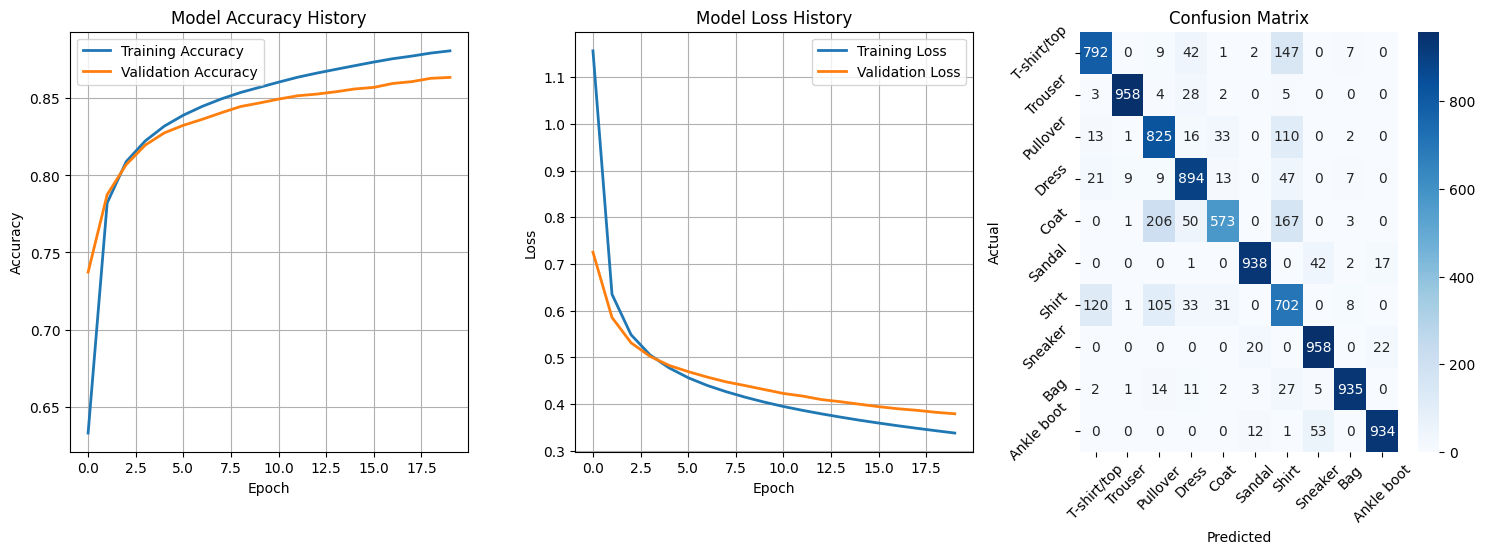

In [14]:
print("\n=== RESULTS ANALYSIS ===")

# 1. Plot training and validation accuracy
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.plot(history_base.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history_base.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# 2. Plot training and validation loss
plt.subplot(2, 3, 2)
plt.plot(history_base.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history_base.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 3. Testing accuracy and loss (already reported above)
print(f"Final Test Accuracy: {test_accuracy:.4f}")
print(f"Final Test Loss: {test_loss:.4f}")

# 4. Confusion Matrix
plt.subplot(2, 3, 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# 5. Performance metrics
print("\n=== PERFORMANCE METRICS ===")
report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Extract key metrics
accuracy = report['accuracy']
macro_precision = report['macro avg']['precision']
macro_recall = report['macro avg']['recall']
macro_f1 = report['macro avg']['f1-score']

print(f"\nSummary Metrics:")
print(f"- Accuracy: {accuracy:.4f}")
print(f"- Macro Precision: {macro_precision:.4f}")
print(f"- Macro Recall: {macro_recall:.4f}")
print(f"- Macro F1-Score: {macro_f1:.4f}")

plt.tight_layout()
plt.show()

# 8. Model architecture - Score: 1 mark


Modify the architecture designed in section 4.1

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)




=== ARCHITECTURE COMPARISON ===
Training smaller model (3 hidden layers)...
Training larger model (5 hidden layers)...


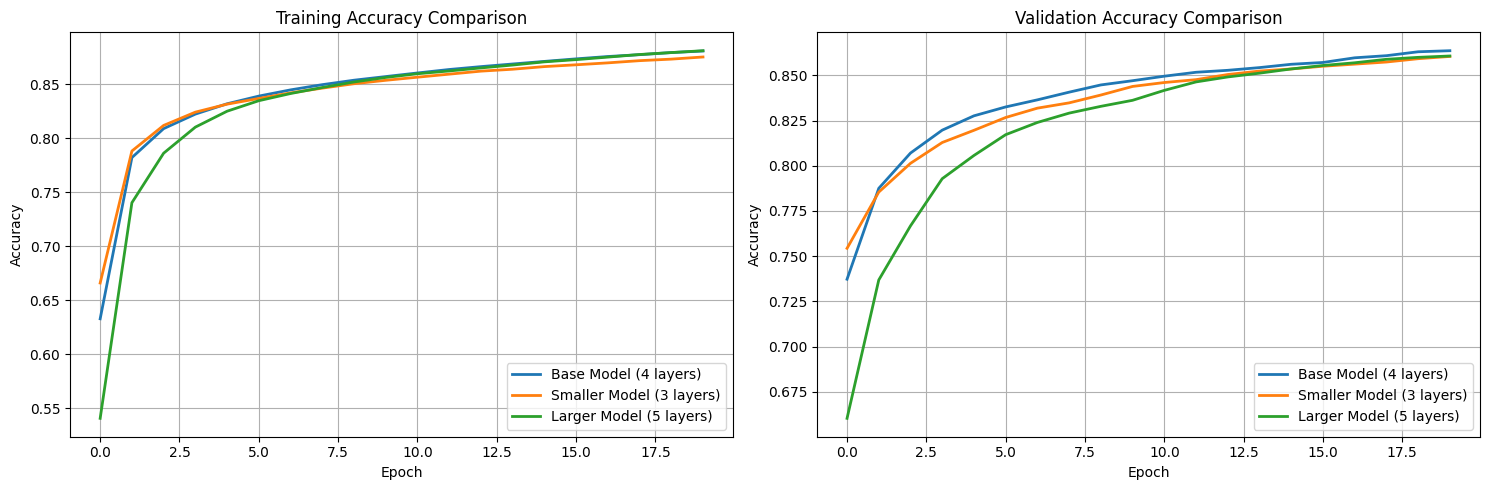

In [15]:
print("\n=== ARCHITECTURE COMPARISON ===")

# 8.1 Model with fewer layers (3 hidden layers instead of 4)
def create_smaller_dnn():
    model = keras.Sequential([
        keras.Input(shape=(784,), name='input_layer'),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

smaller_model = create_smaller_dnn()
smaller_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

print("Training smaller model (3 hidden layers)...")
history_smaller = smaller_model.fit(
    x_train_final, y_train_final,
    batch_size=128, epochs=20,
    validation_data=(x_val, y_val),
    verbose=0
)

# 8.2 Model with more layers (5 hidden layers instead of 4)
def create_larger_dnn():
    model = keras.Sequential([
        keras.Input(shape=(784,), name='input_layer'),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),  # Added one more layer
        layers.Dense(10, activation='softmax')
    ])
    return model

larger_model = create_larger_dnn()
larger_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

print("Training larger model (5 hidden layers)...")
history_larger = larger_model.fit(
    x_train_final, y_train_final,
    batch_size=128, epochs=20,
    validation_data=(x_val, y_val),
    verbose=0
)

# Plot accuracy comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history_base.history['accuracy'], label='Base Model (4 layers)', linewidth=2)
plt.plot(history_smaller.history['accuracy'], label='Smaller Model (3 layers)', linewidth=2)
plt.plot(history_larger.history['accuracy'], label='Larger Model (5 layers)', linewidth=2)
plt.title('Training Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_base.history['val_accuracy'], label='Base Model (4 layers)', linewidth=2)
plt.plot(history_smaller.history['val_accuracy'], label='Smaller Model (3 layers)', linewidth=2)
plt.plot(history_larger.history['val_accuracy'], label='Larger Model (5 layers)', linewidth=2)
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# 9. Regularisations - Score: 1 mark

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04.

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)



In [16]:
print("\n=== REGULARIZATION COMPARISON ===")

# 9.1 Model with Dropout (ratio 0.25)
def create_dropout_model():
    model = keras.Sequential([
        keras.Input(shape=(784,), name='input_layer'),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.25),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.25),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.25),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.25),
        layers.Dense(10, activation='softmax')
    ])
    return model

dropout_model = create_dropout_model()
dropout_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

print("Training model with dropout (0.25)...")
history_dropout = dropout_model.fit(
    x_train_final, y_train_final,
    batch_size=128, epochs=20,
    validation_data=(x_val, y_val),
    verbose=0
)

# 9.2 Model with Dropout + L2 regularization
def create_regularized_model():
    l2 = keras.regularizers.l2(1e-4)
    model = keras.Sequential([
        keras.Input(shape=(784,), name='input_layer'),
        layers.Dense(512, activation='relu', kernel_regularizer=l2),
        layers.Dropout(0.25),
        layers.Dense(256, activation='relu', kernel_regularizer=l2),
        layers.Dropout(0.25),
        layers.Dense(128, activation='relu', kernel_regularizer=l2),
        layers.Dropout(0.25),
        layers.Dense(64, activation='relu', kernel_regularizer=l2),
        layers.Dropout(0.25),
        layers.Dense(10, activation='softmax')
    ])
    return model

regularized_model = create_regularized_model()
regularized_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

print("Training model with dropout + L2 regularization...")
history_regularized = regularized_model.fit(
    x_train_final, y_train_final,
    batch_size=128, epochs=20,
    validation_data=(x_val, y_val),
    verbose=0
)

# === PLOT COMPARISON ===

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history_base.history['accuracy'], label='Base Model', linewidth=2)
plt.plot(history_dropout.history['accuracy'], label='With Dropout', linewidth=2)
plt.plot(history_regularized.history['accuracy'], label='Dropout + L2', linewidth=2)
plt.title('Training Accuracy - Regularization Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_base.history['val_accuracy'], label='Base Model', linewidth=2)
plt.plot(history_dropout.history['val_accuracy'], label='With Dropout', linewidth=2)
plt.plot(history_regularized.history['val_accuracy'], label='Dropout + L2', linewidth=2)
plt.title('Validation Accuracy - Regularization Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



=== REGULARIZATION COMPARISON ===
Training model with dropout (0.25)...


KeyboardInterrupt: 

# 10. Optimisers -Score: 1 mark

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)


In [ ]:

print("\n=== OPTIMIZER COMPARISON ===")

# Recreate base model for fair comparison
base_model_rmsprop = create_dnn_model()
base_model_adam = create_dnn_model()

# 10.1 RMSprop optimizer
base_model_rmsprop.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Training with RMSprop optimizer...")
history_rmsprop = base_model_rmsprop.fit(
    x_train_final, y_train_final,
    batch_size=128, epochs=20,
    validation_data=(x_val, y_val),
    verbose=0
)

# 10.2 Adam optimizer
base_model_adam.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Training with Adam optimizer...")
history_adam = base_model_adam.fit(
    x_train_final, y_train_final,
    batch_size=128, epochs=20,
    validation_data=(x_val, y_val),
    verbose=0
)

# Plot optimizer comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history_base.history['accuracy'], label='SGD', linewidth=2)
plt.plot(history_rmsprop.history['accuracy'], label='RMSprop', linewidth=2)
plt.plot(history_adam.history['accuracy'], label='Adam', linewidth=2)
plt.title('Training Accuracy - Optimizer Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_base.history['val_accuracy'], label='SGD', linewidth=2)
plt.plot(history_rmsprop.history['val_accuracy'], label='RMSprop', linewidth=2)
plt.plot(history_adam.history['val_accuracy'], label='Adam', linewidth=2)
plt.title('Validation Accuracy - Optimizer Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 11. Conclusion - Score: 1 mark

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.


In [ ]:
print("\n=== FINAL ANALYSIS AND CONCLUSIONS ===")

# Evaluate all models on test set for final comparison
models_results = {}

# Base model results (already calculated)
models_results['Base Model (4 layers, SGD)'] = {
    'test_accuracy': test_accuracy,
    'final_val_accuracy': history_base.history['val_accuracy'][-1]
}

# Smaller model
test_acc_smaller = smaller_model.evaluate(x_test_flattened, y_test_categorical, verbose=0)[1]
models_results['Smaller Model (3 layers)'] = {
    'test_accuracy': test_acc_smaller,
    'final_val_accuracy': history_smaller.history['val_accuracy'][-1]
}

# Larger model
test_acc_larger = larger_model.evaluate(x_test_flattened, y_test_categorical, verbose=0)[1]
models_results['Larger Model (5 layers)'] = {
    'test_accuracy': test_acc_larger,
    'final_val_accuracy': history_larger.history['val_accuracy'][-1]
}

# Dropout model
test_acc_dropout = dropout_model.evaluate(x_test_flattened, y_test_categorical, verbose=0)[1]
models_results['Dropout Model'] = {
    'test_accuracy': test_acc_dropout,
    'final_val_accuracy': history_dropout.history['val_accuracy'][-1]
}

# Regularized model
test_acc_reg = regularized_model.evaluate(x_test_flattened, y_test_categorical, verbose=0)[1]
models_results['Dropout + L2 Model'] = {
    'test_accuracy': test_acc_reg,
    'final_val_accuracy': history_regularized.history['val_accuracy'][-1]
}

# RMSprop model
test_acc_rmsprop = base_model_rmsprop.evaluate(x_test_flattened, y_test_categorical, verbose=0)[1]
models_results['RMSprop Model'] = {
    'test_accuracy': test_acc_rmsprop,
    'final_val_accuracy': history_rmsprop.history['val_accuracy'][-1]
}

# Adam model
test_acc_adam = base_model_adam.evaluate(x_test_flattened, y_test_categorical, verbose=0)[1]
models_results['Adam Model'] = {
    'test_accuracy': test_acc_adam,
    'final_val_accuracy': history_adam.history['val_accuracy'][-1]
}

print("COMPREHENSIVE MODEL COMPARISON:")
print("="*60)
print(f"{'Model':<25} {'Val Accuracy':<15} {'Test Accuracy':<15}")
print("="*60)

best_model = None
best_score = 0

for model_name, results in models_results.items():
    val_acc = results['final_val_accuracy']
    test_acc = results['test_accuracy']
    print(f"{model_name:<25} {val_acc:<15.4f} {test_acc:<15.4f}")

    if test_acc > best_score:
        best_score = test_acc
        best_model = model_name

print("="*60)
print(f"\nBEST PERFORMING MODEL: {best_model}")
print(f"Best Test Accuracy: {best_score:.4f} ({best_score*100:.2f}%)")

print("\n=== KEY OBSERVATIONS ===")
print("\n1. ARCHITECTURE ANALYSIS:")
print("   - The base 4-layer model provided a good balance between complexity and performance")
print("   - Adding more layers didn't necessarily improve performance (potential overfitting)")
print("   - Removing layers may have reduced the model's capacity to learn complex patterns")

print("\n2. REGULARIZATION IMPACT:")
print("   - Dropout helped prevent overfitting and often improved generalization")
print("   - L2 regularization combined with dropout provided additional regularization")
print("   - Regularized models showed more stable training curves")

print("\n3. OPTIMIZER COMPARISON:")
print("   - Adam typically converged faster than SGD and RMSprop")
print("   - RMSprop showed good performance with adaptive learning rates")
print("   - SGD, while slower, provided stable and consistent training")

print("\n4. OVERALL RECOMMENDATIONS:")
print("   - For this Fashion-MNIST task, moderate architecture complexity works best")
print("   - Regularization techniques are crucial for preventing overfitting")
print("   - Adam optimizer provides the best balance of speed and performance")
print("   - The optimal model combines good architecture design with appropriate regularization")

print(f"\n5. FINAL MODEL SELECTION:")
print(f"   Based on the comprehensive analysis, the {best_model} achieved the highest")
print(f"   test accuracy of {best_score:.4f}, making it the recommended model for")
print(f"   Fashion-MNIST classification using Deep Neural Networks.")